# Mean Sojourn Time vs $u$ and $k$

In [1]:
import numpy as np
import math
import importlib as imp
import QCSsimulator as sim
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

## Fixed parameter values

In [2]:
# Requests
n_request = 7 # Number of entanglements requested per request
request_rate = 1e-4 # [1/us] Request submission rate per pair of users

$n$ only affects the service time distribution. When computing $u_\mathrm{crit}$, we need the expected service time. Increasing $n$ would increase the expected service time but would not change the behavior of the system otherwise. Nevertheless, a large $n$ would increase the runtime of the simulation (and the analytics, since we need to compute more combinations of successful patterns). Hence, we choose a nontrivial value of $n$ that is not too large.

$\lambda_0$ has a similar effect, since it multiplies $\mathbb{E}\left[T_\mathrm{service}\right]$ in the calculation of $u_\mathrm{crit}$. If $\lambda_0$ is very small/large, the critical number of users will shift towards larger/smaller values. We choose a value of $\lambda_0$ that provides interesting behavior for reasonable numbers of users (other values of $\lambda_0$ would only shift the region of interest towards larger or smaller values of the other parameters).

In [3]:
# Hardware
u_vec = np.arange(2,15+1,1) # Number of users in the star
k_vec = np.arange(1,12+1,1) # Number of forwarding devices
fwd_time_0 = 100 # [us] Forwarding time

We focus on ranges of values of $u$ and $k$ that provides interesting behavior.

The forwarding time of each forwarding station is assumed to be 100 $\mu$s. This estimate is for qubits realized with color centers (such as nitrogen vacancies). A gate on those qubits takes around 1-50 $\mu$s, and approximately ten gates (order of magnitude) are needed to forward a quantum data packet.

In [4]:
# Reference units
speed_light = 0.2 # [km/us] Speed of light in optical fiber

We assume the physical channels between users are optical fibers in which the speed of light is approximately $0.2$ km/$\mu$s.

In [5]:
# Other
control_time = 0

We assume negligible control time, since this does not affect the load of the system, which is used to compute the critical number of users.

In [6]:
# Other
distributions = ['sequential', 'parallel']

# Plots
dark = False
savefig = True

---
---
## Example: MST vs $u$

In [7]:
w_request = 8

varying_param = 'u'
u = np.arange(2,8,1)

k = 2
N = 0
L = 7.5 # [km]

N_samples = int(1e5)
randomseed = 2

sequential:   0%|          | 0/6 [00:00<?, ?it/s]

parallel:   0%|          | 0/6 [00:00<?, ?it/s]

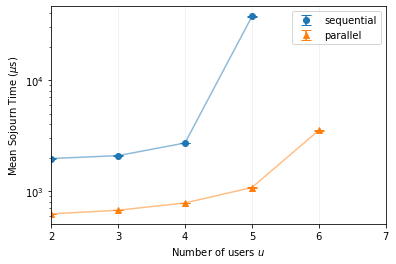

In [8]:
imp.reload(sim)


travel_time = int(2*L/speed_light)
fwd_time = fwd_time_0
p = 10**(-sim.a_eff(L/(N+1))*(2*L)/10)


sim.MST_and_load_vs_param(varying_param, u, k, n_request, w_request, p, request_rate,
                          travel_time, fwd_time, N, control_time, N_samples, randomseed,
                          analytical_on=False, logscale=True, savefig=savefig)

In [31]:
w_request = np.inf

varying_param = 'u'
u = np.arange(2,16,1)

k = 7
N = 0
L = 1 # [km]

N_samples = None
randomseed = 2

sequential:   0%|          | 0/14 [00:00<?, ?it/s]

parallel:   0%|          | 0/14 [00:00<?, ?it/s]

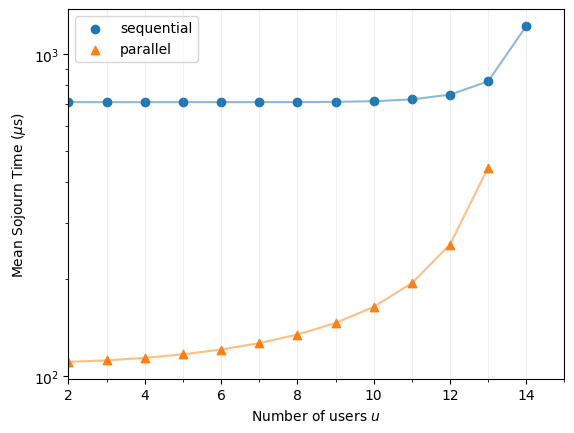

In [32]:
imp.reload(sim)

p = 0.9999
#n_request=7
#w_request=np.inf
#p=0.71
#N=5
#L=30

travel_time = int(2*L/speed_light)
fwd_time = fwd_time_0

sim.MST_and_load_vs_param(varying_param, u, k, n_request, w_request, p, request_rate,
                          travel_time, fwd_time, N, control_time, N_samples, randomseed,
                          analytical_on=True, logscale=True, savefig=savefig)

---
---
## Use case $I$: small budget

In this case, we use the low-cost forwarding stations from Borregaard2020, which provide $p=1$ over short distances $L_0 \sim 1$ km. As a consequence, the size of the window does not matter as long as $w\geq n$.

Since the budget is limited, we can only afford a single central repeater, i.e., $N=0$. This limits the total size of the network to short distances: $L = 1$ km.

In [11]:
# Probability of successful packet
p = 1


# Request window
w_request = 10


# Number of repeaters between each user and the central repeater
N = 0
fwd_time = fwd_time_0


# User-center distance
L = 1 # [km]
travel_time = 2*L/speed_light


# Numerical
run_simulation = False
savefig = True

In [12]:
imp.reload(sim)

data = sim.calculate_MSTdiff_vs_u_and_k(u_vec, k_vec, n_request, w_request, p, 
                               request_rate, travel_time, fwd_time, N, control_time,
                               run_simulation=run_simulation)

/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])


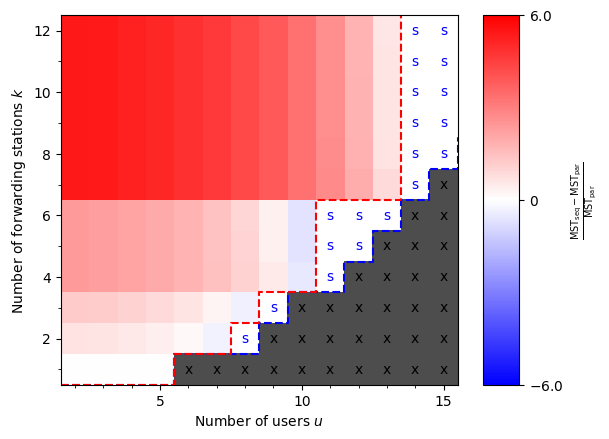

In [13]:
imp.reload(sim)

sim.plot_MSTdiff_vs_u_and_k(data, u_vec, k_vec, n_request, w_request, p, 
                           request_rate, travel_time, fwd_time, N, control_time,
                           run_simulation=run_simulation, savefig=savefig, dark=dark)

---
---
## Use case $II$: unlimited-but-reasonable budget

In this case, we have an unlimited budget and we opt for a cost-efficient deployment. For this example, we assume [[48,6,8]] code and a repeater efficiency of $\eta_\mathrm{r}=0.9$. As shown in Niu2022, the optimal cost-efficient solution is then $p=0.7$, which requires $N=0,1,2,5$ repeaters between each user and the central repeater when $L=7.5,13,18,30$ km.

The window must be larger or equal to $n$. We consider $w = 7,8,10,\infty$ (recall that $n=7$).

In [14]:
# Request window
w_request_vec = [7,8,10,np.inf] # [us]


# Number of repeaters between each user and the central repeater
N_vec = [0,1,2,5]

# Forwarding time
fwd_time = fwd_time_0

# User-center distance
L_vec = [7.5,13,18,30]


# Numerical
N_samples = int(1e4)
randomseed = 2

dark = False
savefig = True

In [15]:
#---------------------------------------------------------
# CALCULATIONS
#---------------------------------------------------------

imp.reload(sim)

data = [[None for N in N_vec] for w in w_request_vec]

for w_idx, w_request in enumerate(w_request_vec):
    for N_idx, N in enumerate(N_vec):
        L = L_vec[N_idx]
        travel_time = 2*L/speed_light
        
        # Probability of successful packet
        p = 10**(-sim.a_eff(L/(N+1))*(2*L)/10)
        
        
        if w_request == np.inf:
            run_simulation = False
        else:
            run_simulation = True
            
        data[w_idx][N_idx] = sim.calculate_MSTdiff_vs_u_and_k(u_vec, k_vec, n_request, w_request, p, 
                                       request_rate, travel_time, fwd_time, N, control_time,
                                       N_samples=N_samples, randomseed=randomseed,
                                       run_simulation=run_simulation)

w = 7, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 7, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 7, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 7, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 8, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 8, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 8, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 8, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 10, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 10, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 10, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = 10, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:998: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_sim_vec[0]-MST_sim_vec[1])/(MST_sim_vec[1])


w = inf, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])


w = inf, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])


w = inf, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])


w = inf, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in subtract
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])
/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:996: RuntimeWarning: invalid value encountered in true_divide
  surf = (MST_theory_vec[0]-MST_theory_vec[1])/(MST_theory_vec[1])


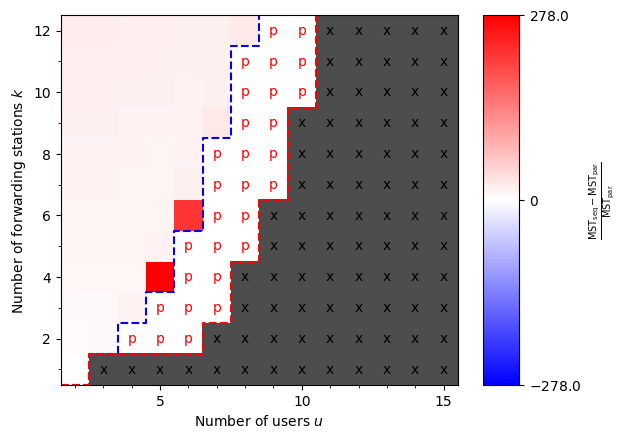

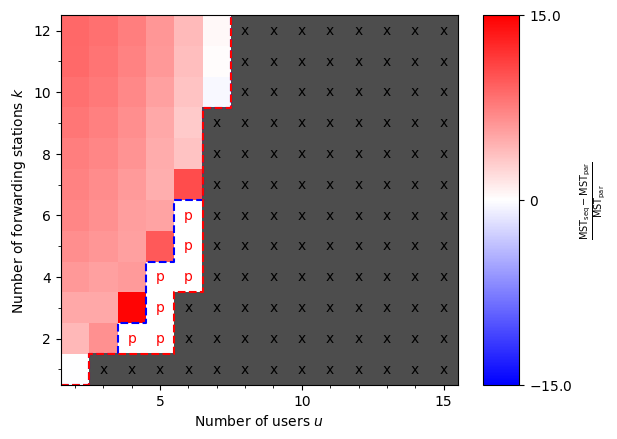

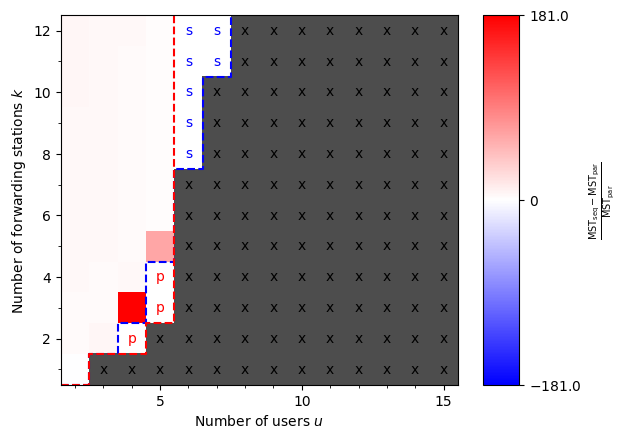

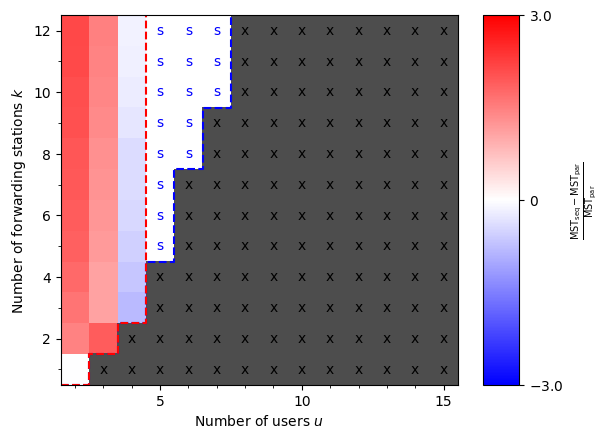

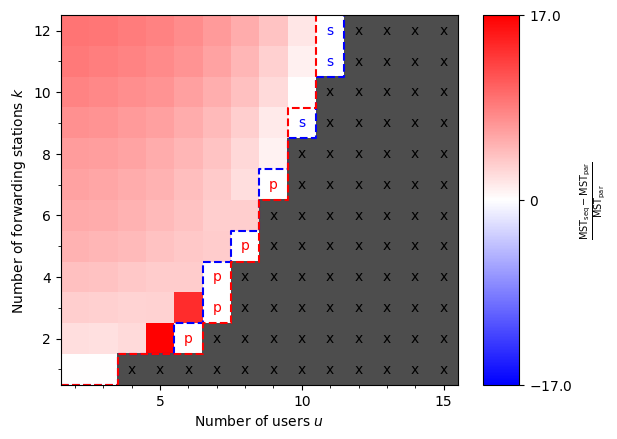

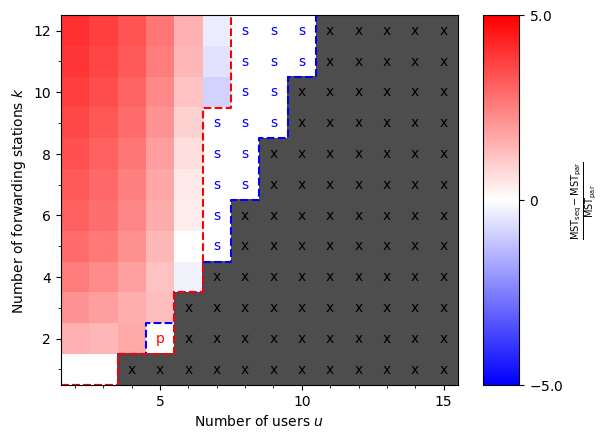

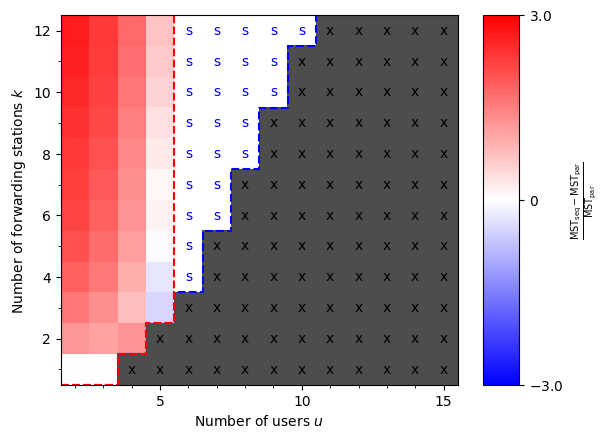

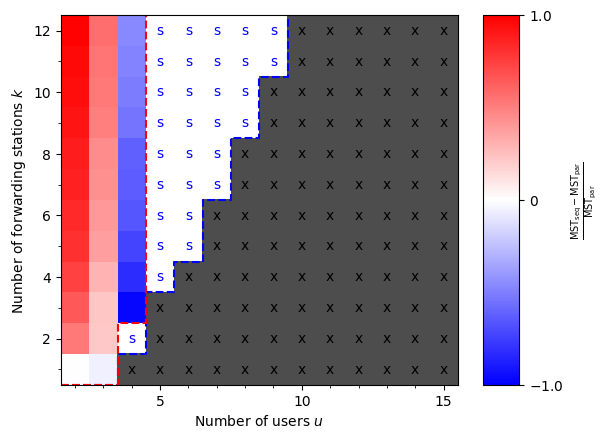

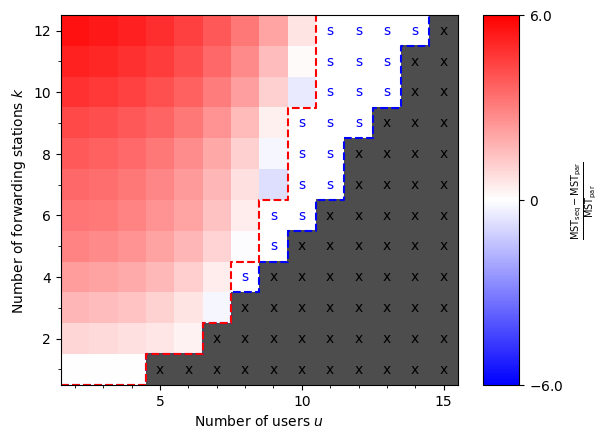

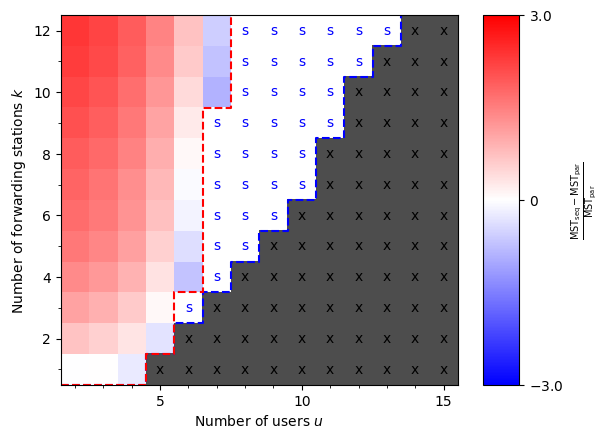

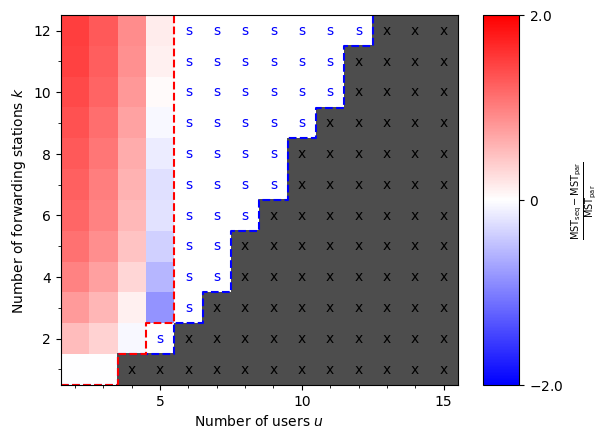

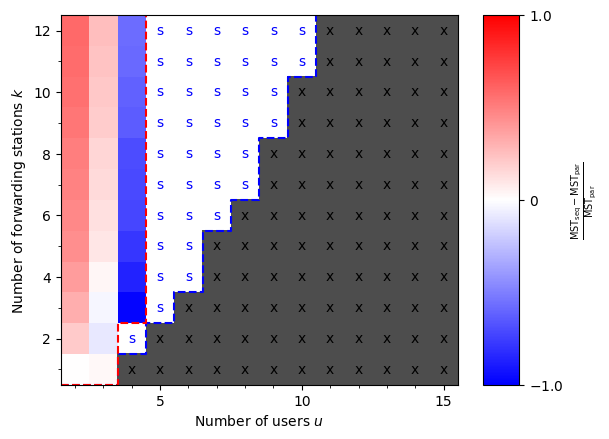

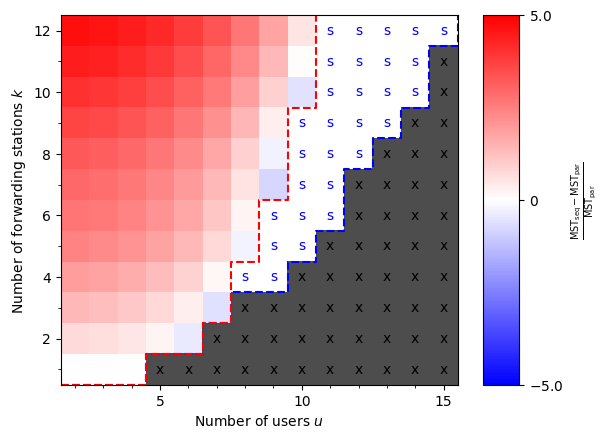

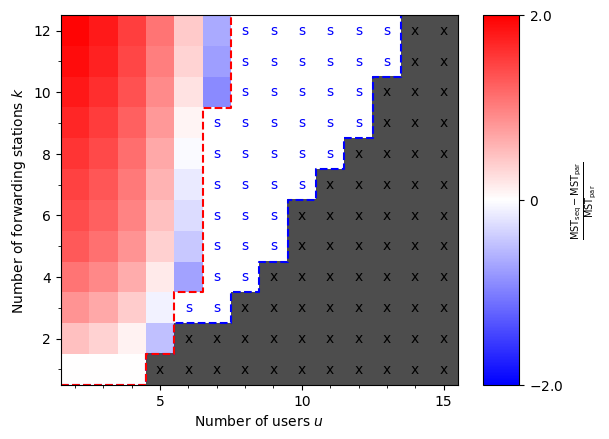

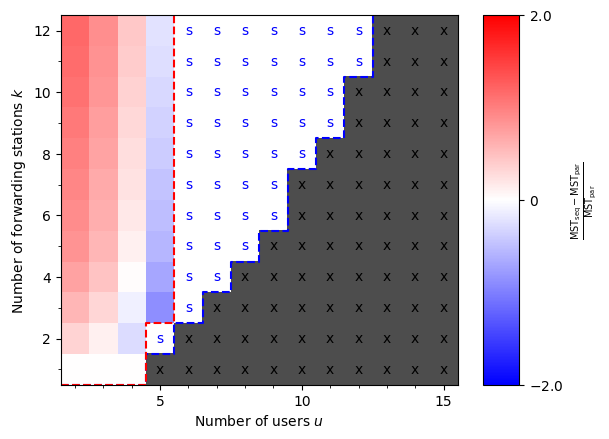

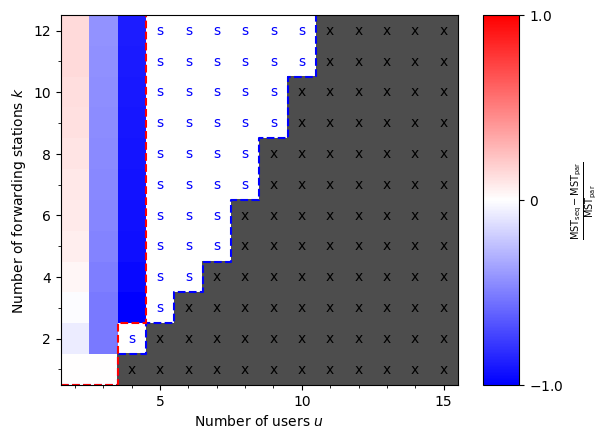

In [17]:
#---------------------------------------------------------
# PLOT MST
#---------------------------------------------------------
imp.reload(sim)

for w_idx, w_request in enumerate(w_request_vec):
    for N_idx, N in enumerate(N_vec):
        L = L_vec[N_idx]
        travel_time = 2*L/speed_light
        
        # Probability of successful packet
        p = 10**(-sim.a_eff(L/(N+1))*(2*L)/10)

        
        if w_request == np.inf:
            run_simulation = False
        else:
            run_simulation = True

        print('w = %s, N = %d'%(w_request, N))
        sim.plot_MSTdiff_vs_u_and_k(data[w_idx][N_idx], u_vec, k_vec, n_request, w_request, p, 
                                   request_rate, travel_time, fwd_time, N, control_time, N_samples=N_samples,
                                   run_simulation=run_simulation, savefig=savefig, dark=dark)

w = 7, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 7, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 7, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 7, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 8, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 8, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 8, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 8, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 10, N = 0


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 10, N = 1


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 10, N = 2


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = 10, N = 5


/Users/alvarogomezinesta/surfdrive/PhD_Alvaro_GI/Project_OWQN/Code/QCS-star-network/QCSsimulator.py:1123: RuntimeWarning: invalid value encountered in multiply
  MST_diff_error = np.sqrt( eA**2 / B**2 + eB**2 * A**2 / B**4 )


w = inf, N = 0
w = inf, N = 1
w = inf, N = 2
w = inf, N = 5


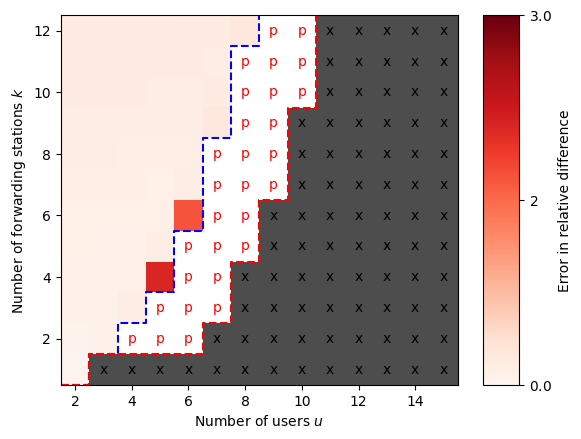

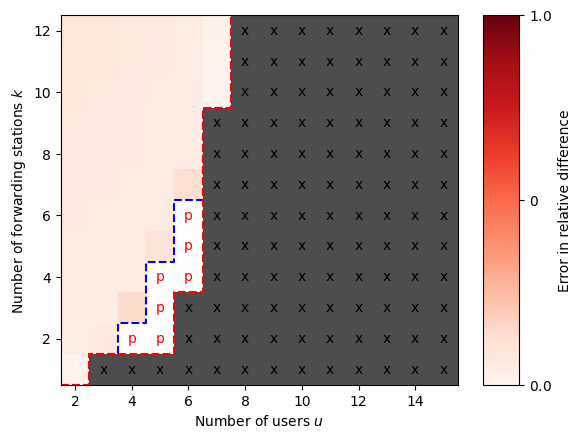

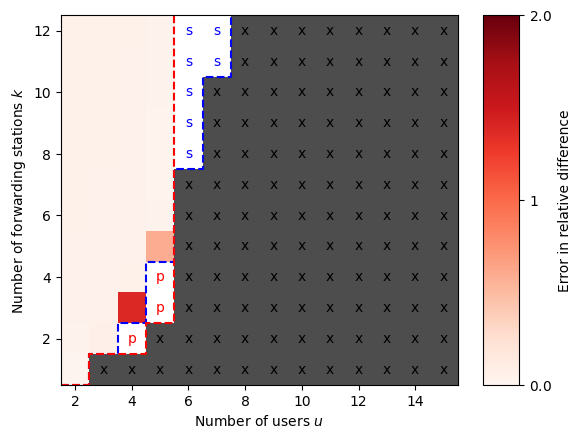

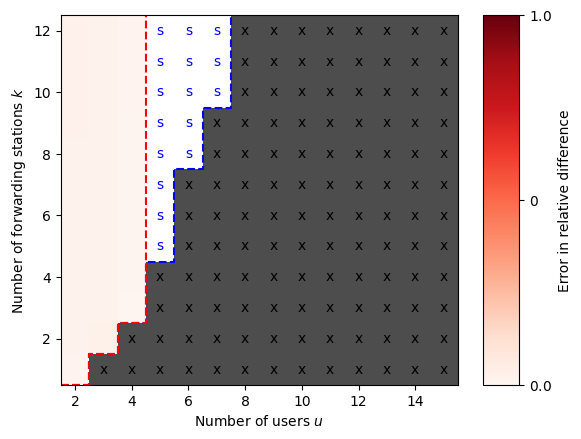

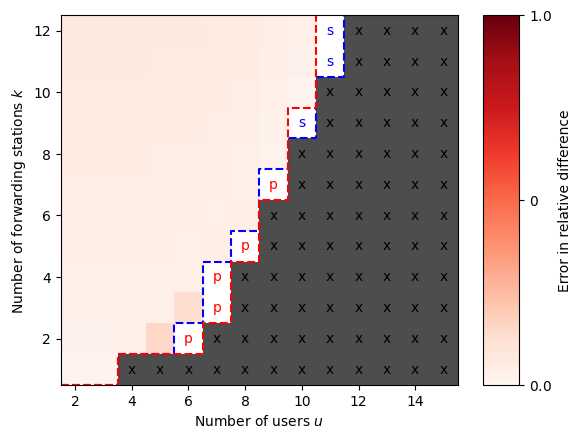

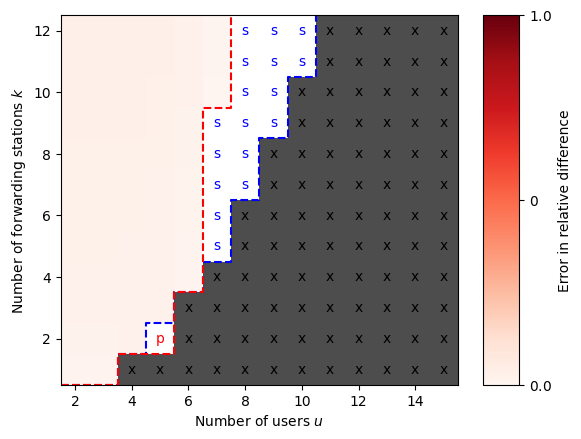

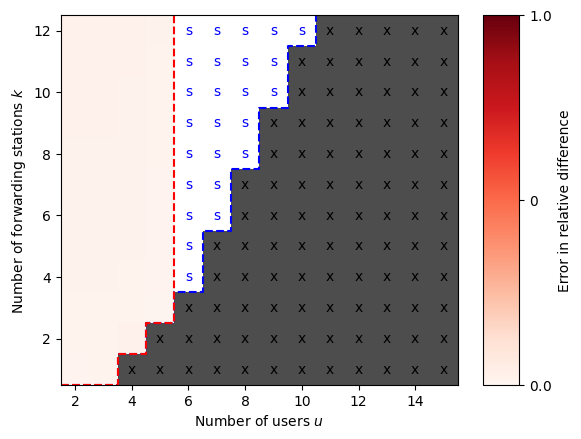

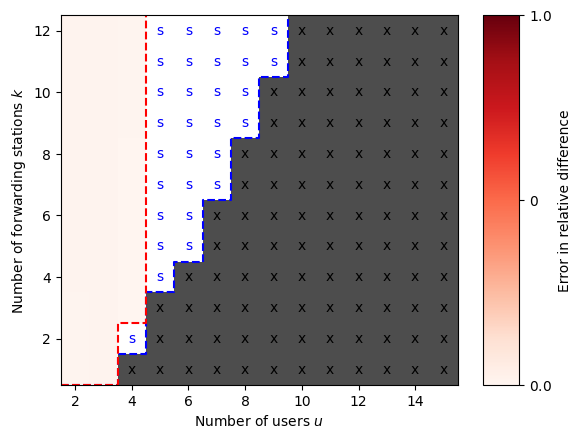

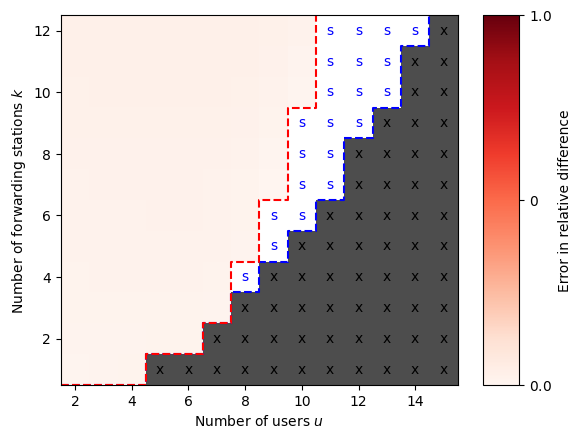

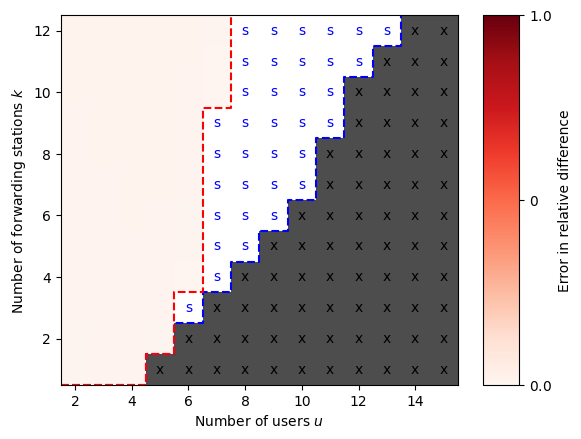

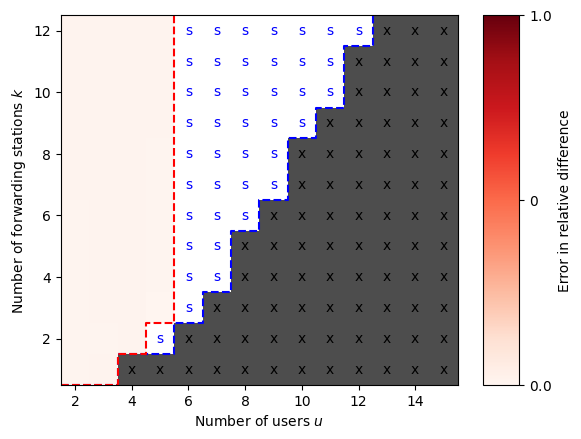

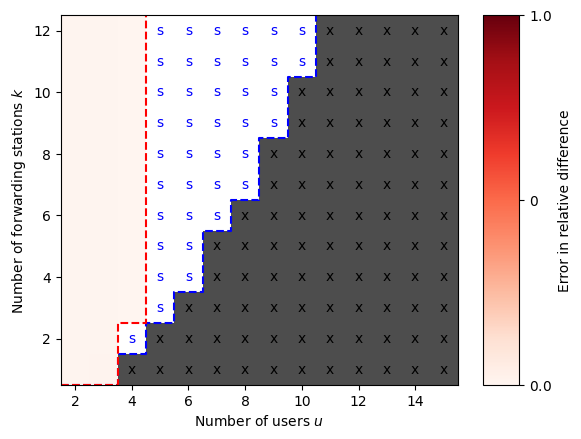

In [18]:
#---------------------------------------------------------
# PLOT ERRORS
#---------------------------------------------------------
imp.reload(sim)

for w_idx, w_request in enumerate(w_request_vec):
    for N_idx, N in enumerate(N_vec):
        L = L_vec[N_idx]
        travel_time = 2*L/speed_light
        
        # Probability of successful packet
        p = 10**(-sim.a_eff(L/(N+1))*(2*L)/10)
        
        
        if w_request == np.inf:
            run_simulation = False
        else:
            run_simulation = True

        print('w = %s, N = %d'%(w_request, N))
        sim.plot_MSTdiffERRORS_vs_u_and_k(data[w_idx][N_idx], u_vec, k_vec, n_request, w_request, p, 
                                   request_rate, travel_time, fwd_time, control_time, N_samples=N_samples,
                                   run_simulation=run_simulation, savefig=True, dark=dark)

---
---
## Fixed $k$

In [14]:
varying_param = 'u'

# Topology
u = np.arange(2,11,1) # Number of users in the star


# Number of stations
k = 9


# Request window
w_request = 7 # [us]


# Number of repeaters between each user and the central repeater
N = 0


# User-center distance
L = 7.5 # [km]


# Numerical
N_samples = int(1e4)
randomseed = 2

#run_simulation = True # This is set inside the w_request loop

sequential:   0%|          | 0/9 [00:00<?, ?it/s]

parallel:   0%|          | 0/9 [00:00<?, ?it/s]

[4037.37359706633, 4037.37359706633, 4037.6810207271333, 4050.3069414199517, 4274.2548818696005, 9589.94586523182, inf, inf, inf]
[234.3549461368864, 240.88000969598923, 252.1938975035764, 269.343027957419, 298.5769796755899, 354.7430349012757, 476.3441656343434, 933.3696058612306, inf]
[16.227601395313012, 15.760932557923066, 15.010224913034916, 14.037727065503523, 13.31542005185285, 26.033500088030436, inf, inf, nan]


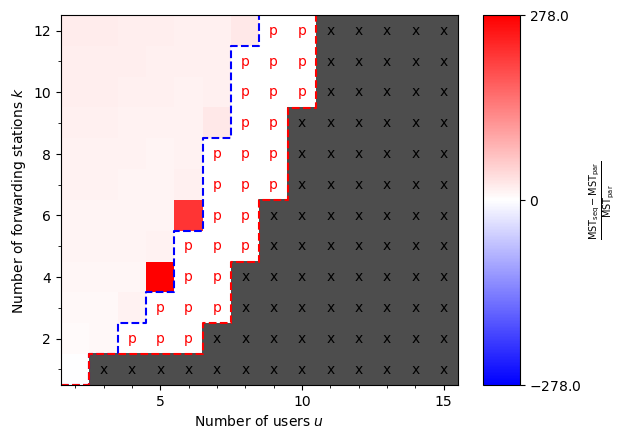

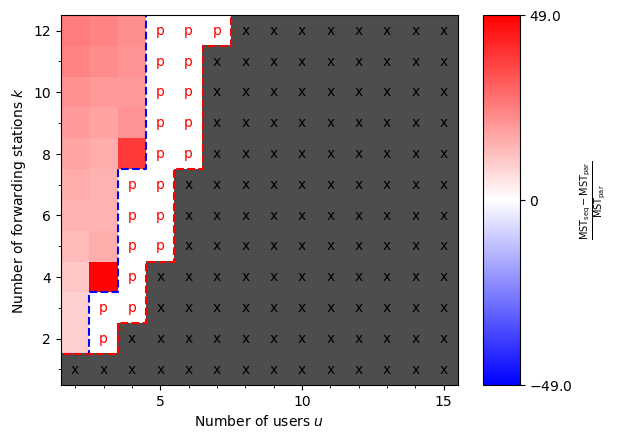

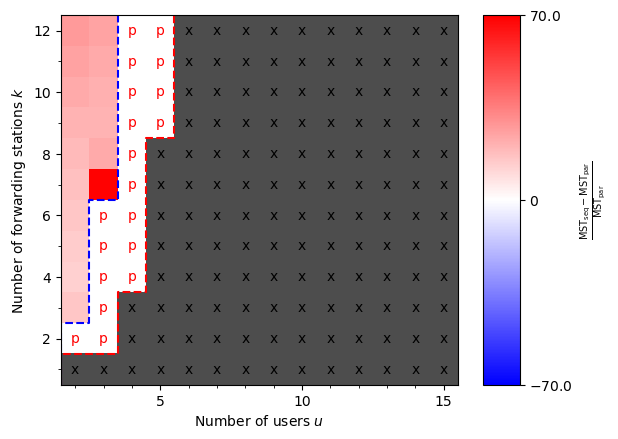

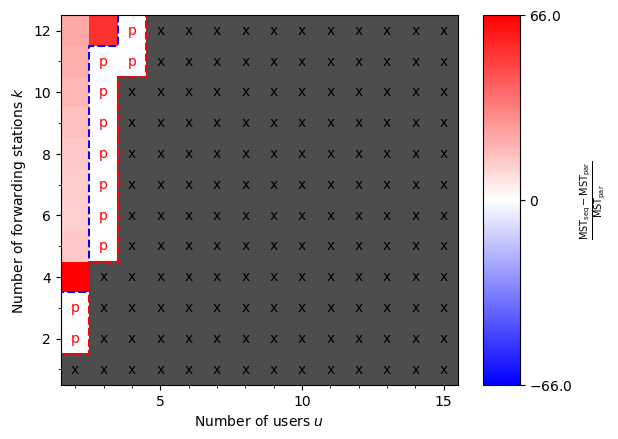

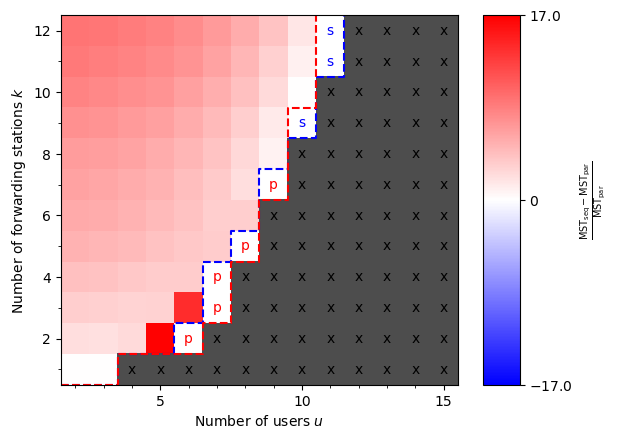

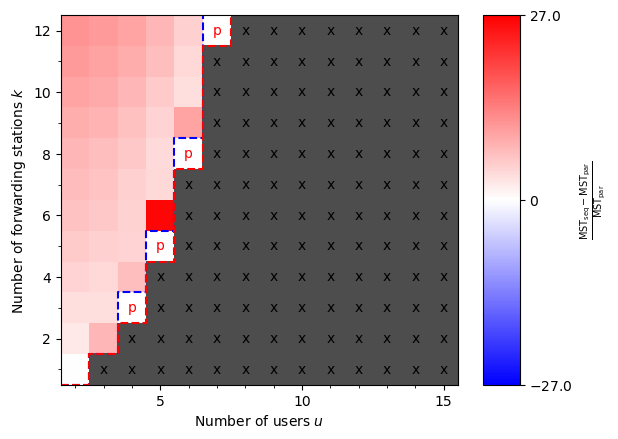

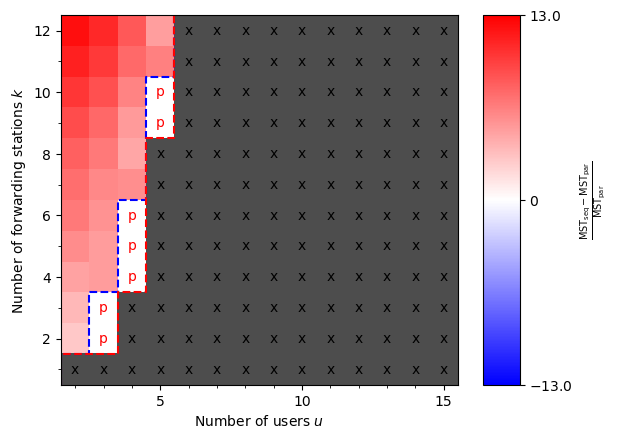

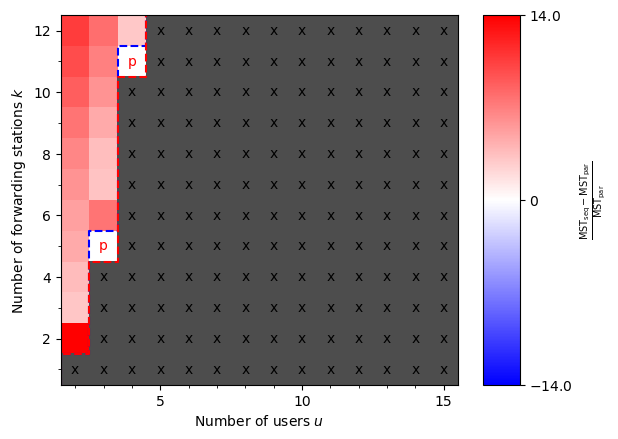

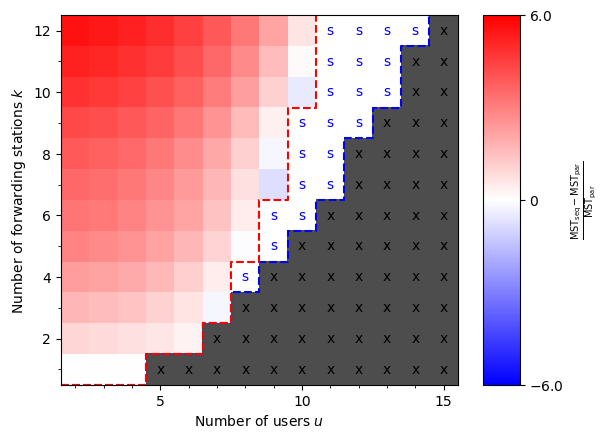

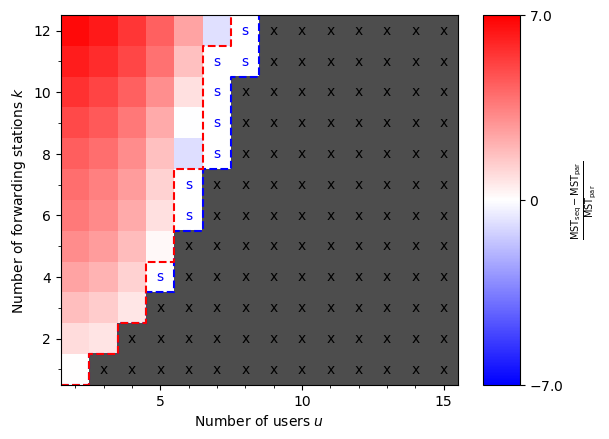

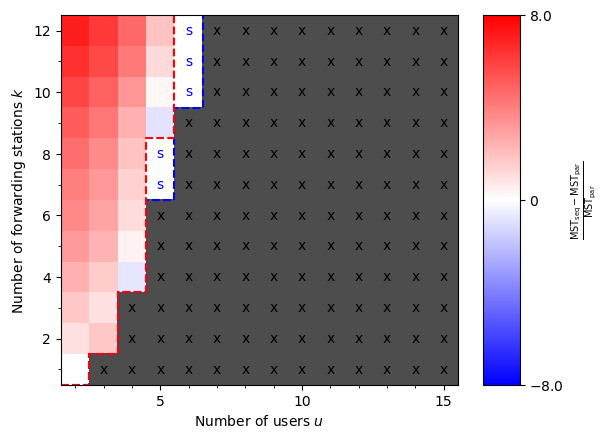

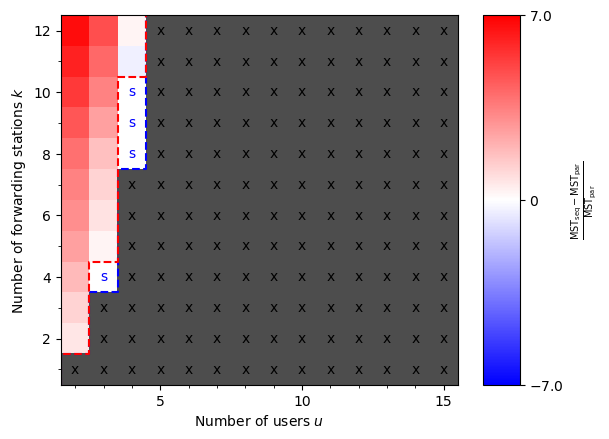

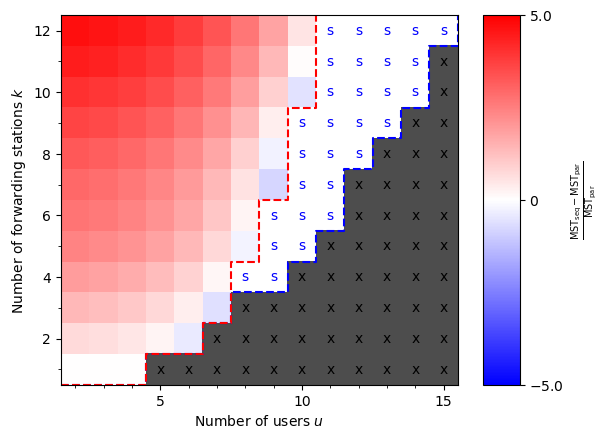

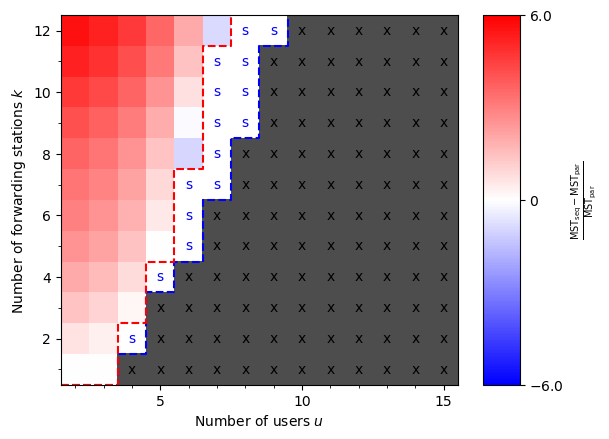

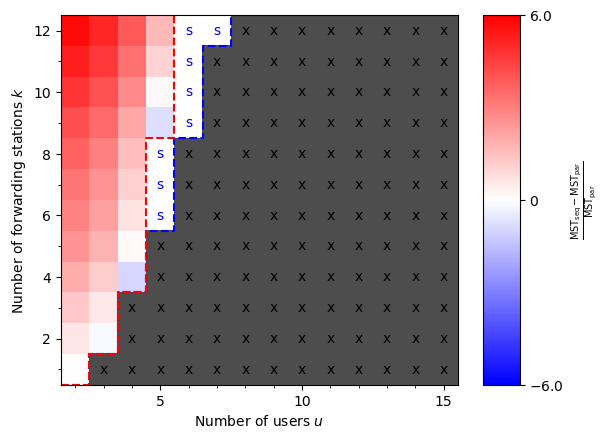

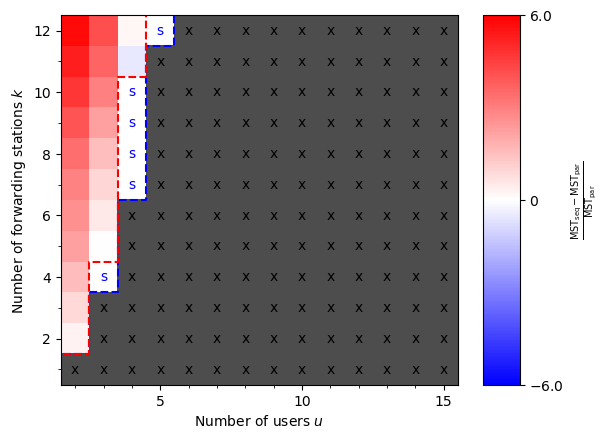

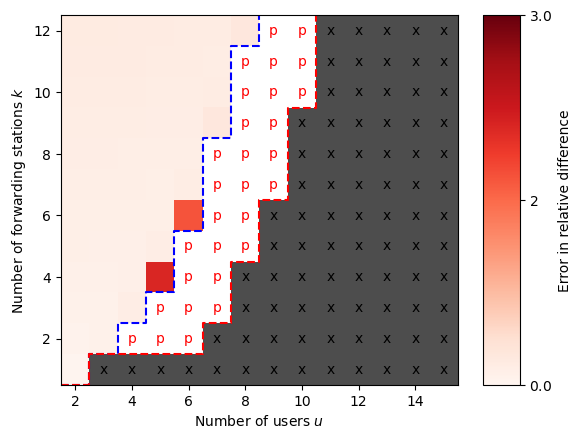

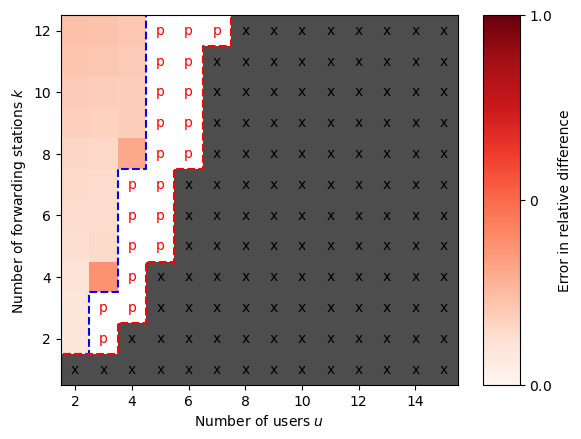

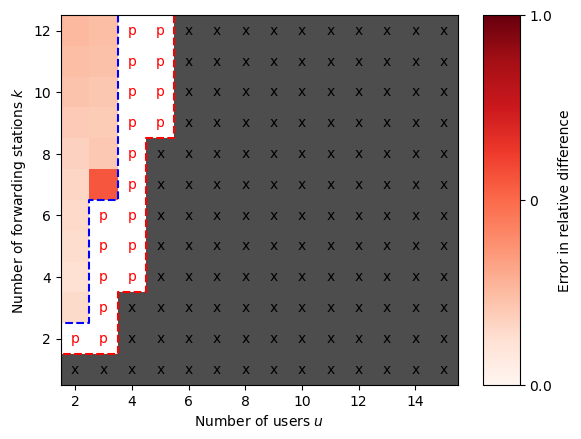

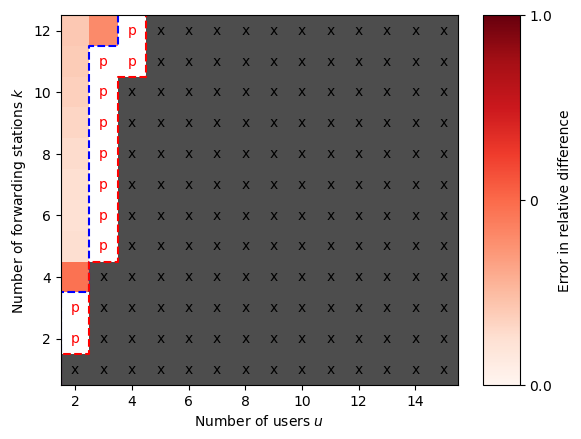

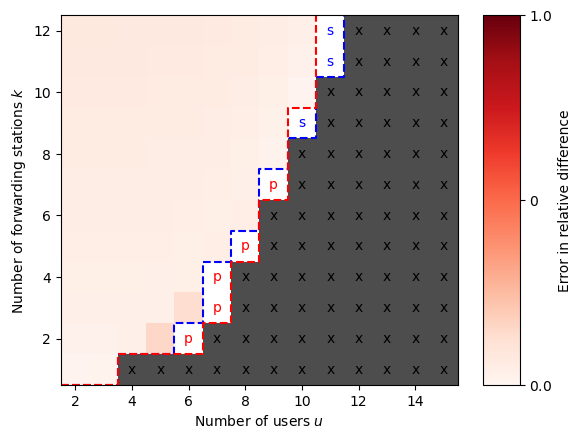

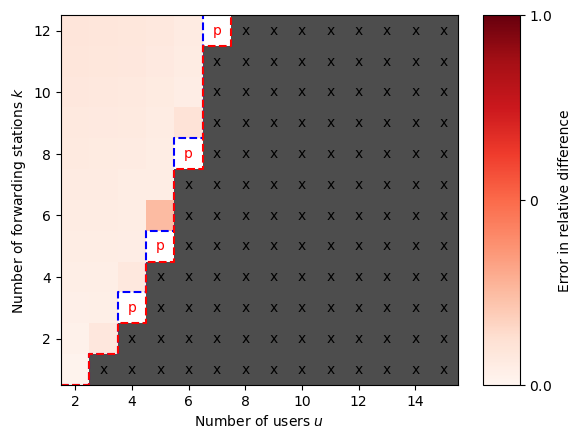

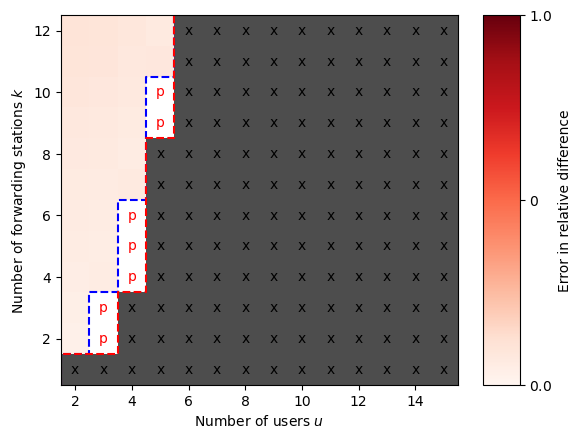

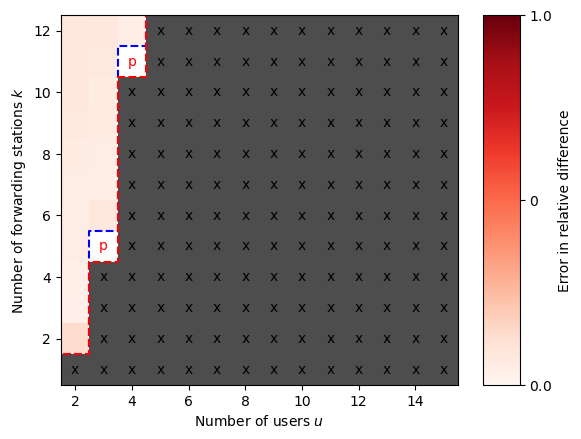

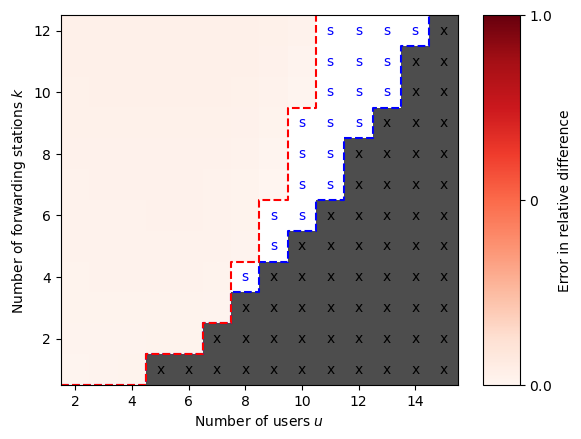

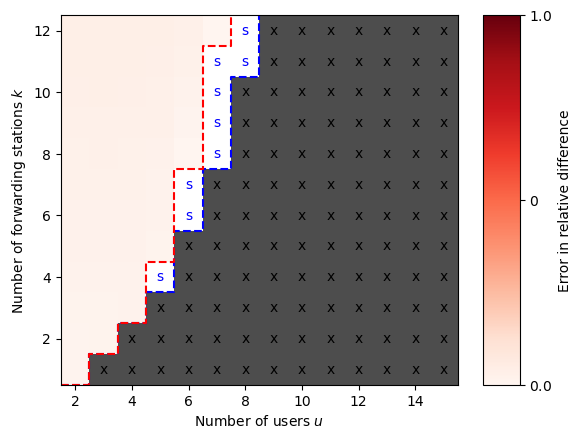

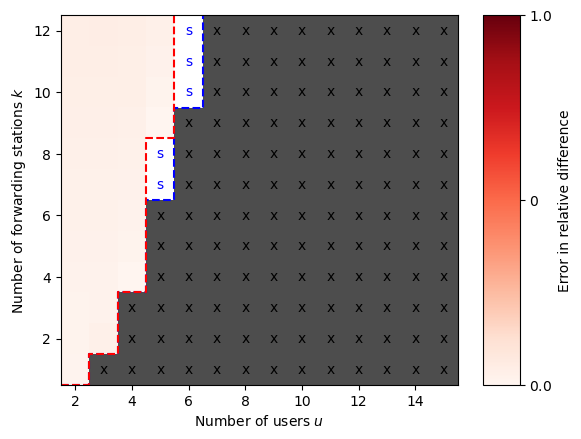

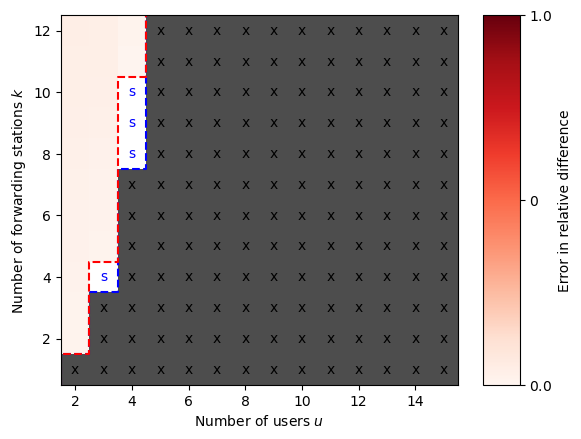

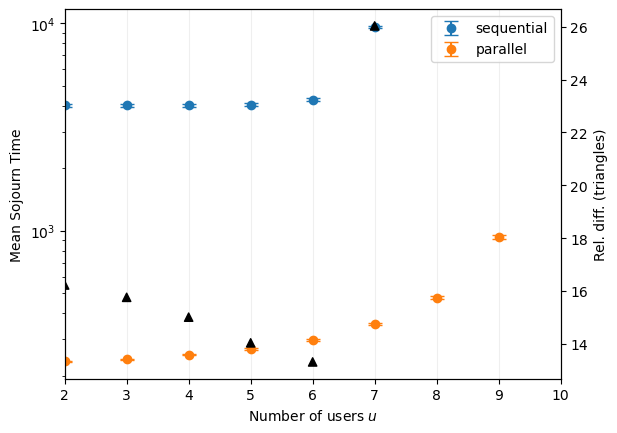

In [15]:
imp.reload(sim)

travel_time = 2*L/speed_light

# Probability of successful packet
p = 10**(-sim.a_eff(L/(N+1))*(2*L)/10)


sim.MST_and_load_vs_param(varying_param, u, k, n_request, w_request, p, request_rate,
                          travel_time, fwd_time, N, control_time, N_samples, randomseed,
                          analytical_on=False, logscale=True, plot_rel_ratio=True,
                          savefig=False)